****Required Libraries loaded****


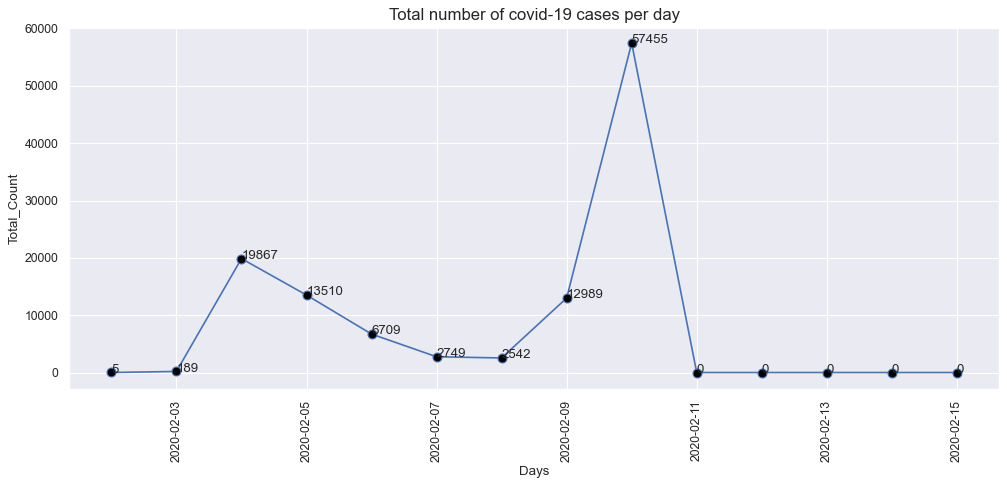

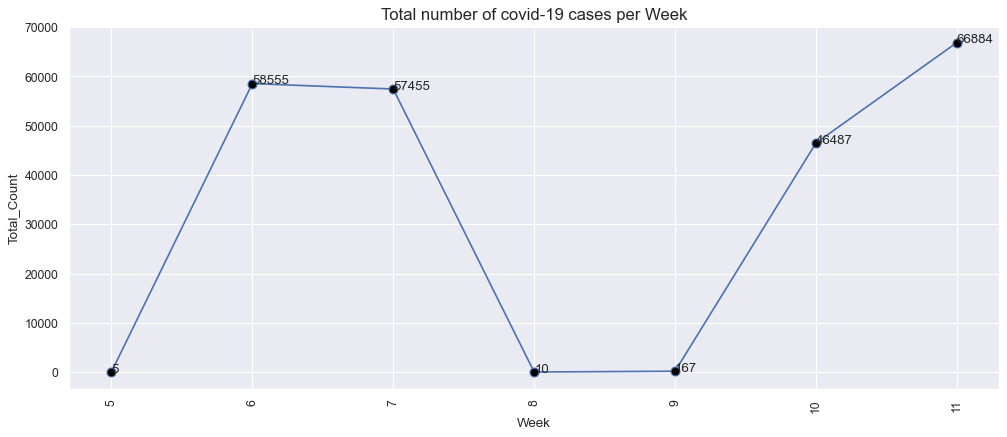

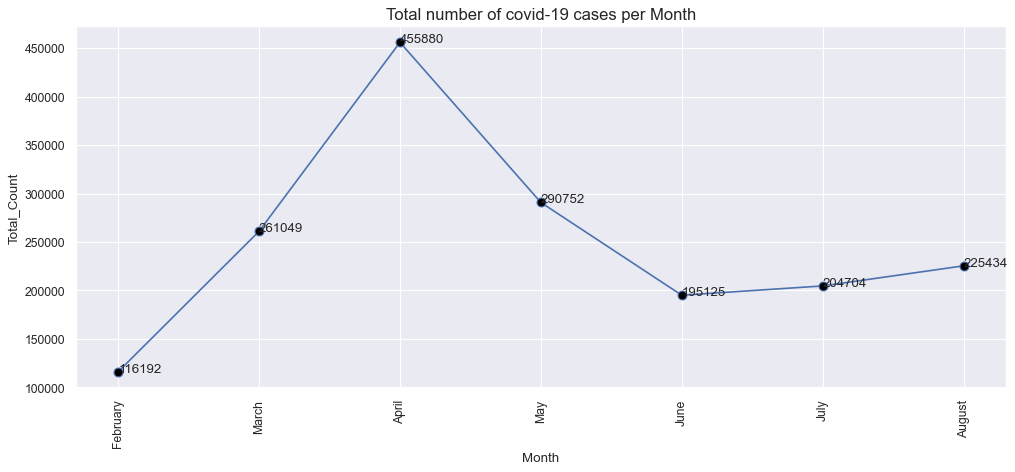

2020-03-17


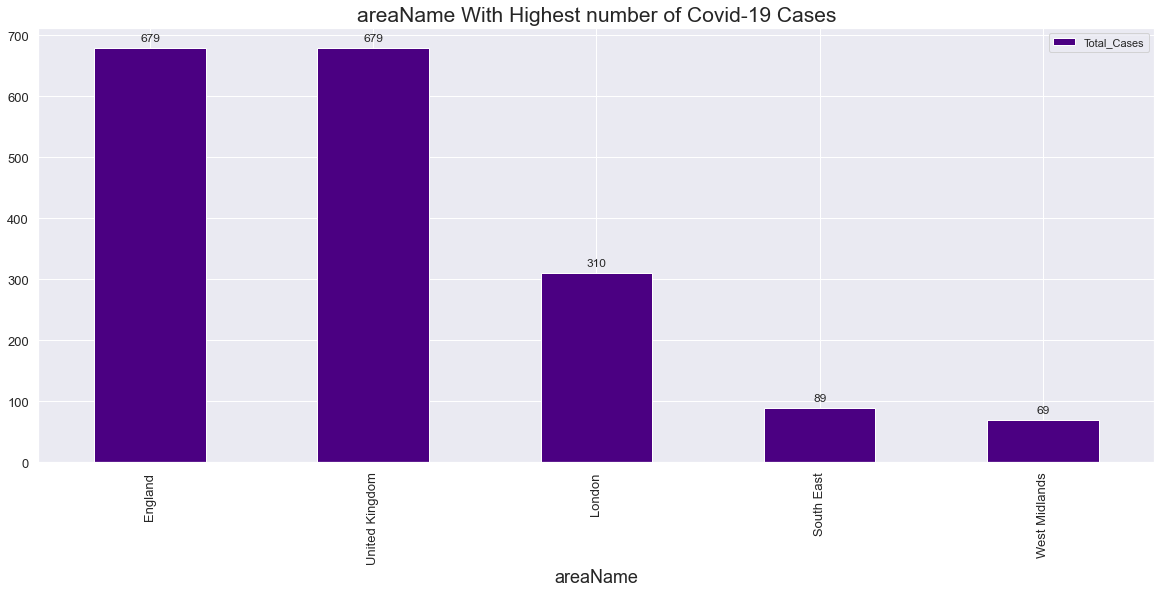

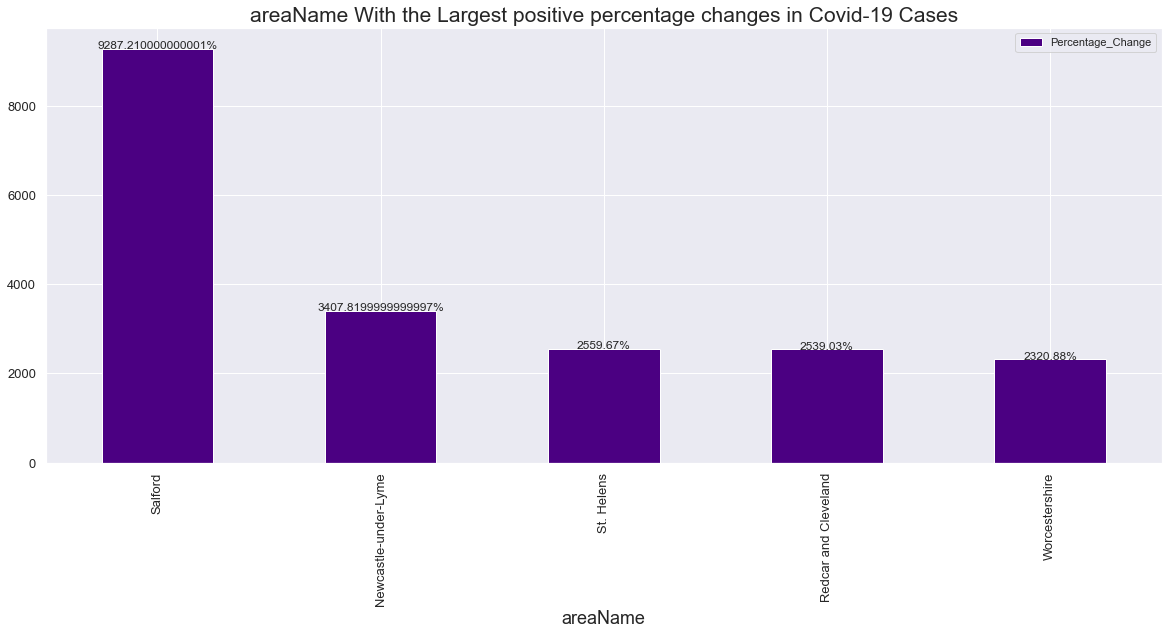

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 115027 entries, 0 to 115026
Data columns (total 13 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   areaType       115027 non-null  object        
 1   areaCode       115027 non-null  object        
 2   areaName       115027 non-null  object        
 3   date           115027 non-null  datetime64[ns]
 4   Children       115027 non-null  int64         
 5   Teenagers      115027 non-null  int64         
 6   Youths         115027 non-null  int64         
 7   Middle_Aged    115027 non-null  int64         
 8   Elderly        115027 non-null  int64         
 9   Unassigned     115027 non-null  int64         
 10  Young_Group    115027 non-null  int64         
 11  Elderly_Group  115027 non-null  int64         
 12  Total_Cases    115027 non-null  int64         
dtypes: datetime64[ns](1), int64(9), object(3)
memory usage: 11.4+ MB
None             Children      Teenager

In [1]:
import unittest
%run B1161681(COVID).ipynb


In [2]:
class TestDataSplit(unittest.TestCase):
    def setUp(self):
        self.df = pd.DataFrame({
            'areaType':['ltla','ltla','ltla','ltla','ltla'],
            'areaCode':['E06000001','E06000001','E06000001','E06000001','E06000001'],
            'areaName':['Hartlepool','Hartlepool','Hartlepool','Hartlepool','Hartlepool'],
            'date':['2020-03-16','2020-03-17','2020-03-18','2020-03-20','2020-03-21'],
            'Children':[0,0,0,0,0],
            'Teenagers':[0,0,0,0,0],
            'Youths':[0,0,0,0,0],
            'Middle_Aged':[0,0,0,0,0],
            'Elderly':[1,0,1,0,1],
            'Unassigned':[0,0,0,0,0],
            'Young_Group':[0,0,0,0,0],
            'Elderly_Group':[1,0,1,0,1],
            'Total_Cases':[1,0,1,0,1]
            
        })
        self.df['date'] = pd.to_datetime(self.df['date'])
        self.df.set_index('date', inplace=True)
        self.from_date = '2020-03-16'
        self.to_date = '2020-03-21'
        self.day = '2020-03-17'
        
    
    def test_data_filter_range(self):
        self.df_range = date_filter_range(self.df, self.from_date, self.to_date)
        for i in range(5):
            self.assertListEqual(list(self.df_range.values[i]),list(self.df.values[i]))
        
    def test_data_filter_singe(self):
        self.df_range = date_filter_single(self.df,self.day)
        self.assertListEqual(list(self.df_range.values[0]),list(self.df[self.df.index=='2020-03-17'].values[0]))
        
    def test_grp_singe(self):
        self.df_range = groupby_fxn(self.df,'areaType')
        self.assertListEqual(list(self.df_range.values[0]),list(self.df.groupby('areaType').sum().values[0]))
        
 
        
if __name__=='__main__':
    unittest.main(argv=['first-arg-is-ignored'], exit=False)

...
----------------------------------------------------------------------
Ran 3 tests in 0.018s

OK
